# {Project Title}📝
Salary estimation in tech jobs with experience
![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

Estimate relation between salary with age and experience


## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

Do people with higher experience earn more in tech jobs?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

With more years of experience there is higher chance of having more salary

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->
kaggle 
stack overflow survey data 

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

In [156]:
# Start your code here
import pandas as pd
import numpy as np
import opendatasets as od
import requests
import plotly.express as px
from bs4 import BeautifulSoup
import seaborn as sns
from pandas.plotting import scatter_matrix


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Importing Datasetno.1

In [146]:
df = pd.read_csv(r'C:\stack-overflow-developer-survey-2022\survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


Filter the table to just get the required data

In [147]:
cols_to_keep = ['Employment', 'EdLevel', 'DevType', 'Country','YearsCode','ConvertedCompYearly']
new_df = df.loc[:, cols_to_keep]
new_df.head()

,Employment,EdLevel,DevType,Country,YearsCode,ConvertedCompYearly
0,NaN,NaN,NaN,NaN,NaN,NaN
1,"Employed, full-time",NaN,NaN,Canada,NaN,NaN
2,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Data scientist or machine learning specialist;...,United Kingdom of Great Britain and Northern I...,14,40205.0
3,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",Israel,20,215232.0
4,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end;Developer, full-stack;Dev...",United States of America,8,NaN


Look for null values

In [148]:
new_df.isna().sum()

Employment              1559
EdLevel                 1697
DevType                11966
Country                 1497
YearsCode               1937
ConvertedCompYearly    35197
dtype: int64

Data cleaning: Drop all the null values

In [149]:
new_df.dropna(inplace=True)
new_df.head()

,Employment,EdLevel,DevType,Country,YearsCode,ConvertedCompYearly
2,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Data scientist or machine learning specialist;...,United Kingdom of Great Britain and Northern I...,14,40205.0
3,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",Israel,20,215232.0
8,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end",Netherlands,6,49056.0
10,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack;Developer, back-end",United Kingdom of Great Britain and Northern I...,5,60307.0
11,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Engineering manager,United States of America,12,194400.0


Checked if we have any null values remaining

In [150]:
new_df.isnull().sum()

Employment             0
EdLevel                0
DevType                0
Country                0
YearsCode              0
ConvertedCompYearly    0
dtype: int64

Getting data info

In [142]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37909 entries, 2 to 73121
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           37909 non-null  int64  
 1   Employment           37909 non-null  object 
 2   EdLevel              37909 non-null  object 
 3   DevType              37909 non-null  object 
 4   Country              37909 non-null  object 
 5   YearsCode            37909 non-null  object 
 6   ConvertedCompYearly  37909 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ MB


Data description

In [151]:
new_df.describe()

,ConvertedCompYearly
count,3.790900e+04
mean,1.695137e+05
std,7.633526e+05
min,1.000000e+00
25%,3.588000e+04
50%,6.800000e+04
75%,1.200000e+05
max,5.000000e+07


In [175]:
tech_jobs_df = pd.read_csv(r'C:\Users\diksh\Downloads\salaries_clean.csv')
df.head()

,index,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125000.0,5000.0,0.0,5000 shares,Don't work here.,3/21/16 12:58
1,1,3,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,Senior,15.0,8.0,65000.0,NaN,5000.0,"3,000",NaN,3/21/16 12:58
2,2,4,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,NaN,4.0,1.0,86000.0,5000.0,6000.0,0,NaN,3/21/16 12:59
3,3,6,netapp,waltham,NaN,NaN,NaN,NaN,mts,Other,NaN,4.0,0.0,105000.0,5000.0,8500.0,0,NaN,3/21/16 13:00
4,4,12,apple,cupertino,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4.0,3.0,110000.0,5000.0,7000.0,150000,NaN,3/21/16 13:02


In [176]:
tech_jobs_df.isnull().sum()

Employment             0
EdLevel                0
DevType                0
Country                0
YearsCode              0
ConvertedCompYearly    0
dtype: int64

Importing second dataset

In [133]:
df = pd.read_csv(r'C:\Users\diksh\Downloads\Salary_Data.csv')
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


Histogram plt for the dataset

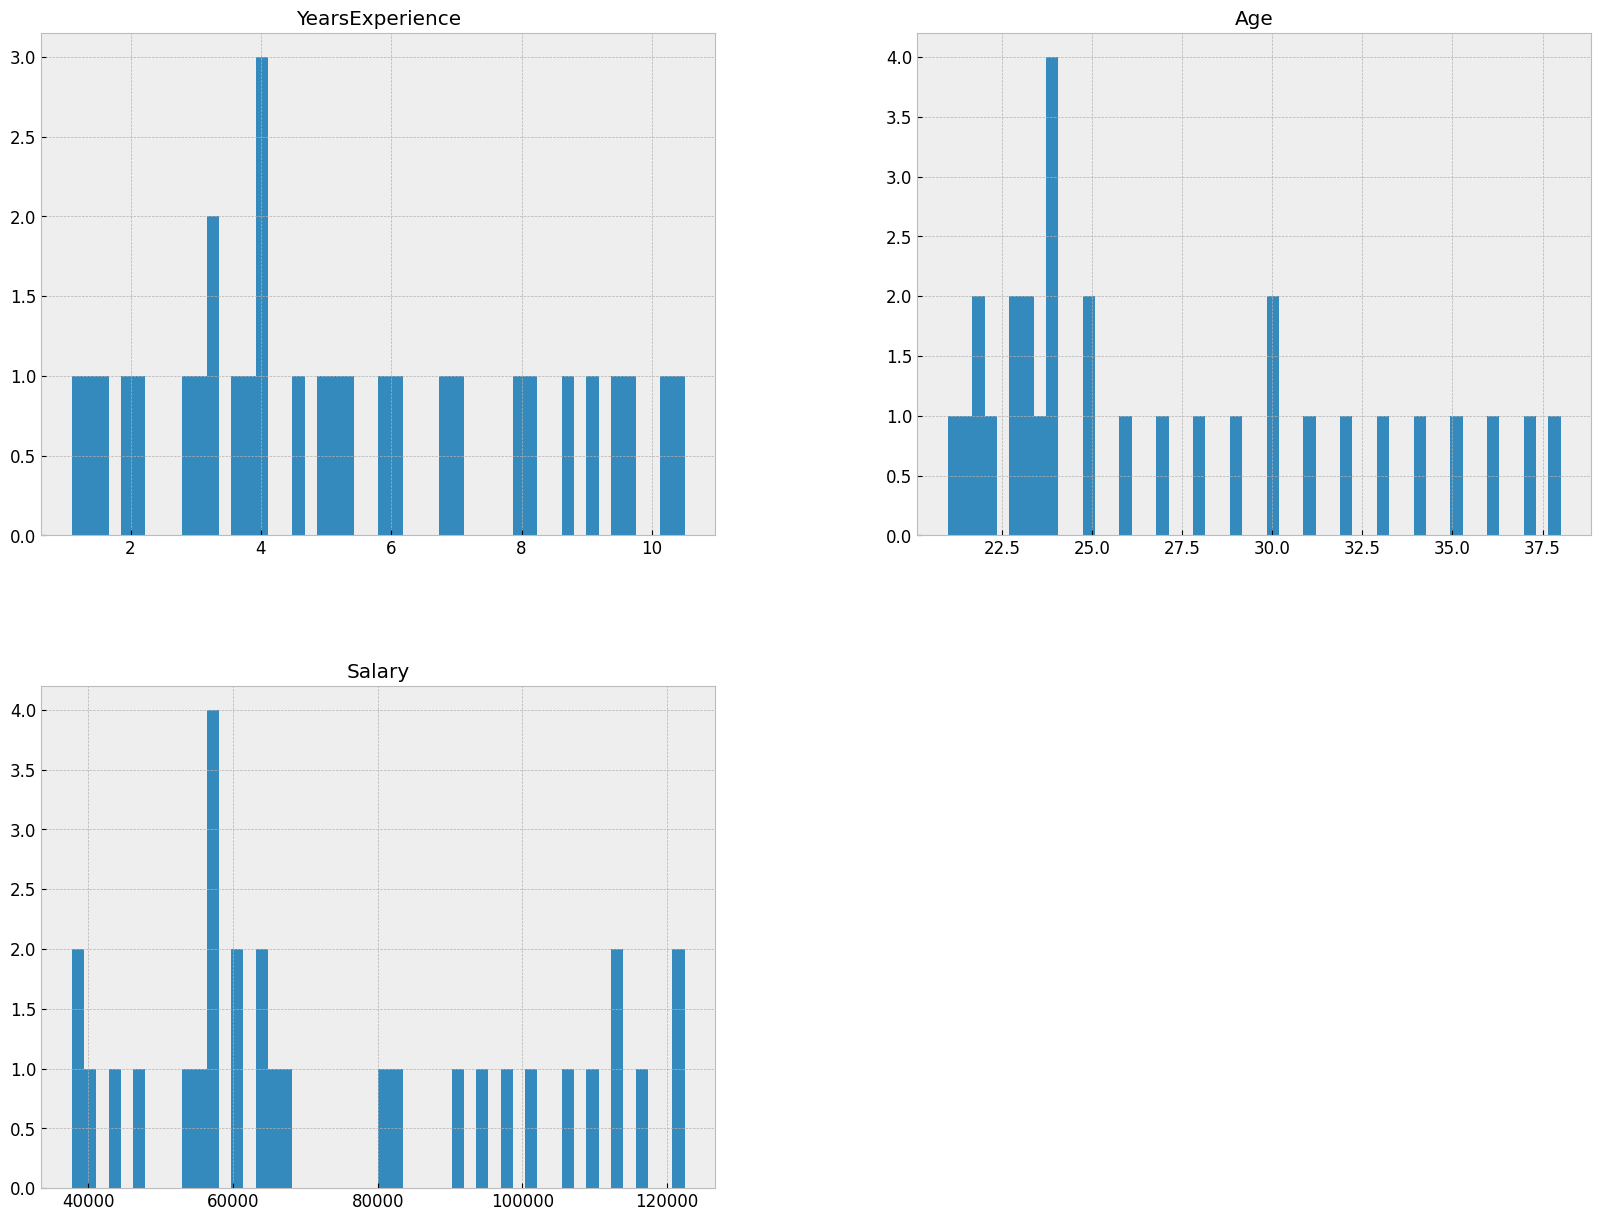

In [60]:
salaries_data_df.hist(bins=50, figsize=(20,15))
plt.show()

Scatter plot for a dataset

<Axes: xlabel='YearsExperience', ylabel='Salary'>

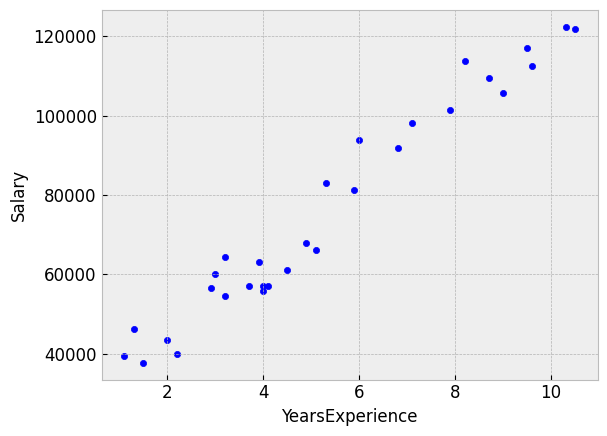

In [65]:
salaries_data_df.plot.scatter(x='YearsExperience',y='Salary')

Finding the correlation Matrix

In [71]:
corr_matrix = salaries_data_df.corr()
print(corr_matrix)

                 YearsExperience       Age    Salary
YearsExperience         1.000000  0.987258  0.978242
Age                     0.987258  1.000000  0.974530
Salary                  0.978242  0.974530  1.000000


Heatmap of the dataset

<Axes: >

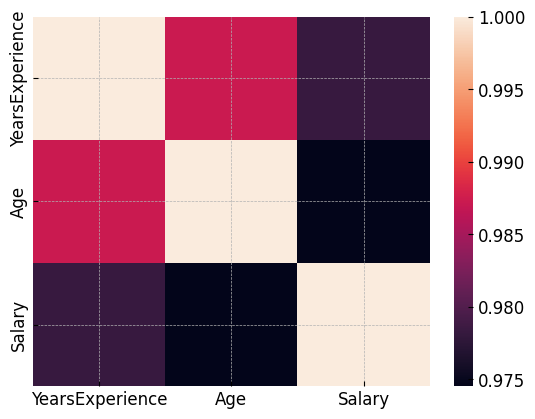

In [72]:
sns.heatmap(corr_matrix)

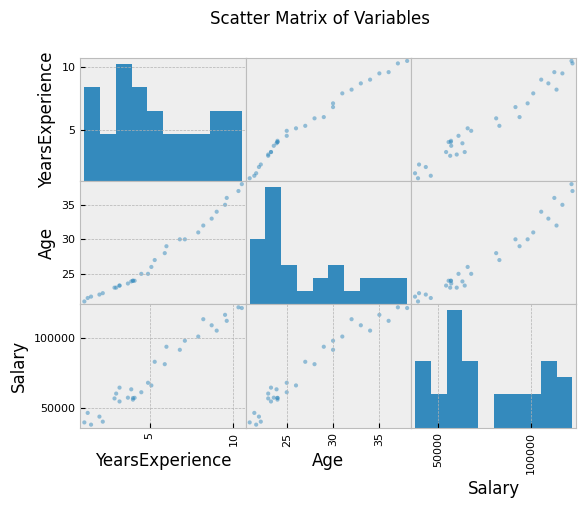

In [77]:
pd.plotting.scatter_matrix(salaries_data_df)
plt.suptitle('Scatter Matrix of Variables')
plt.show()

In [82]:
X = salaries_data_df[['YearsExperience']]  
y = salaries_data_df['Salary']  

model = LinearRegression().fit(X, y)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [9449.96232146]
Intercept: 25792.20019866871


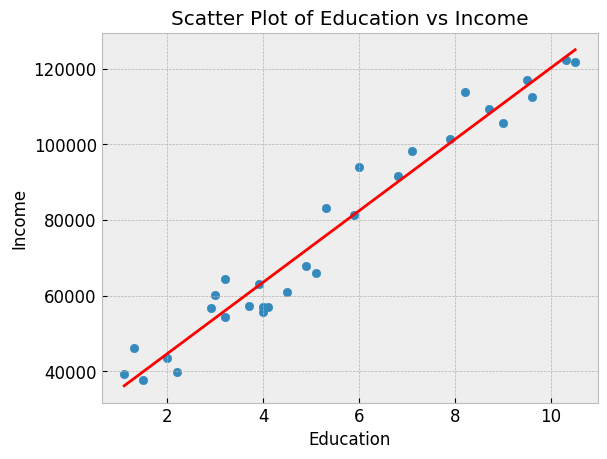

In [84]:
X = salaries_data_df[['YearsExperience']]  
y = salaries_data_df['Salary']  

model = LinearRegression().fit(X, y)

plt.scatter(salaries_data_df[['YearsExperience']], salaries_data_df['Salary'])
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Scatter Plot of Education vs Income')

plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.show()

In [88]:
X = salaries_data_df[['YearsExperience']]  
y = salaries_data_df['Salary']   

model = LinearRegression().fit(X, y)

new_experience = 20
predicted_salary = model.predict([[new_experience]])

print(f'Predicted income for {new_experience} years of education: ${predicted_salary[0]:,.8f}')

Predicted income for 20 years of education: $214,791.44662777


c:\Users\diksh\.virtualenvs\final-project-dthapa1-m3jGeVWs\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Regression
Train the model using sklearn

In [187]:
X = np.array(salaries_data_df['Age']).reshape(-1, 1)
y = np.array(salaries_data_df['Salary']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [188]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [189]:
print("Coefficient Of the line", model.coef_)
print("Intercept Of the model", model.intercept_)

score = model.score(X_test, y_test)
print("Score of the model", score)
print("Accuracy", str(score * 100) + '%')

Coefficient Of the line [[5285.75786184]]
Intercept Of the model [-67205.47797778]
Score of the model 0.9579539899937212
Accuracy 95.79539899937211%


In [190]:
y_predict = model.predict(X_test)

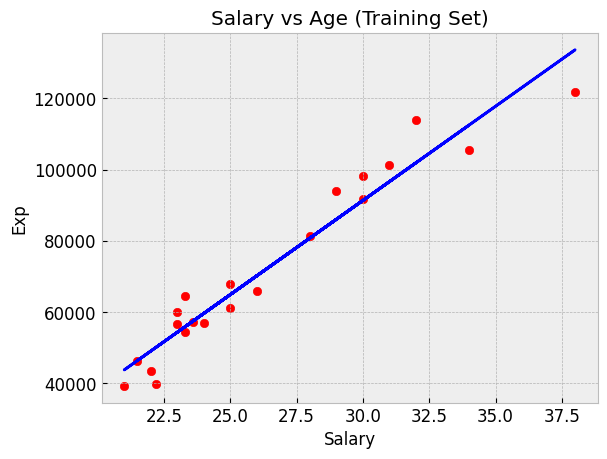

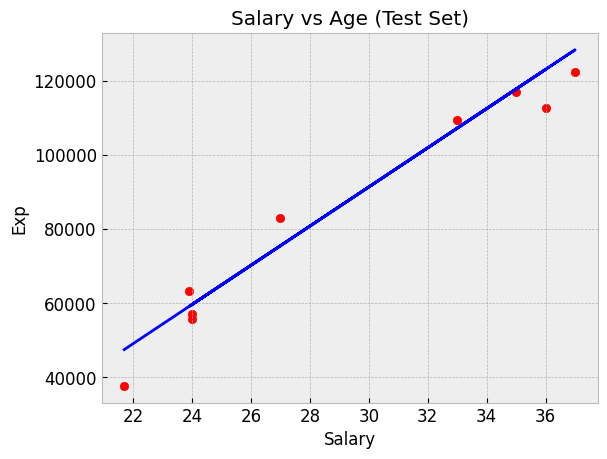

In [191]:

plt.scatter(X_train, y_train, color='r')
plt.plot(X_train, model.predict(X_train), color='b')
plt.title('Salary vs Age (Training Set)')
plt.xlabel('Salary')
plt.ylabel('Exp')
plt.show()

plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, model.predict(X_test), color='b')
plt.title('Salary vs Age (Test Set)')
plt.xlabel('Salary')
plt.ylabel('Exp')
plt.show()


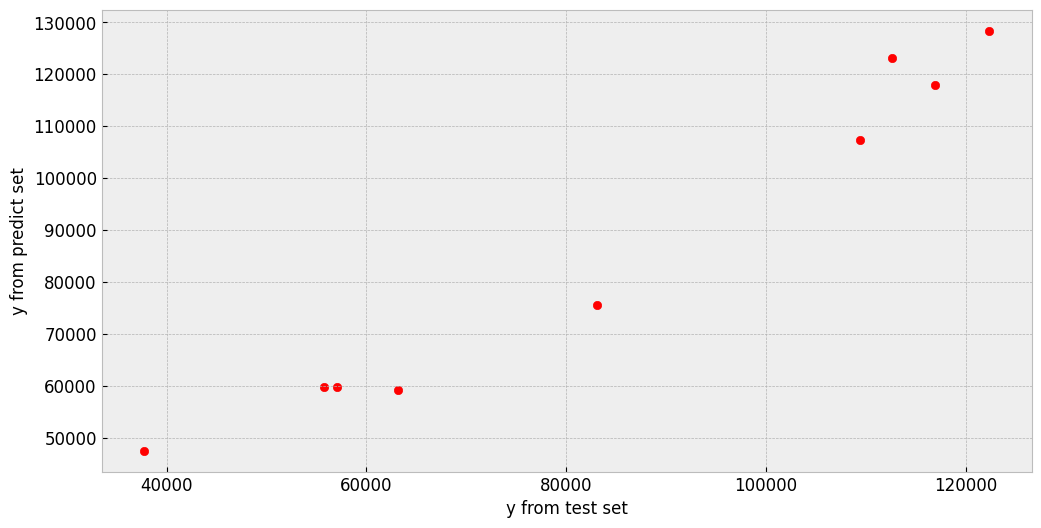

In [192]:
plt.figure(figsize = (12, 6))
plt.scatter(y_test, y_predict, color='r', linestyle='-')
plt.xlabel('y from test set')
plt.ylabel('y from predict set')
plt.show()

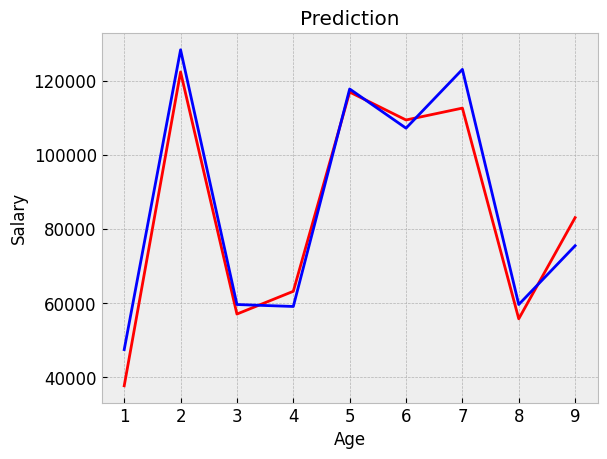

In [193]:
c = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(c, y_test, color='r', linestyle='-')
plt.plot(c, y_predict, color='b', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Prediction')

plt.show()

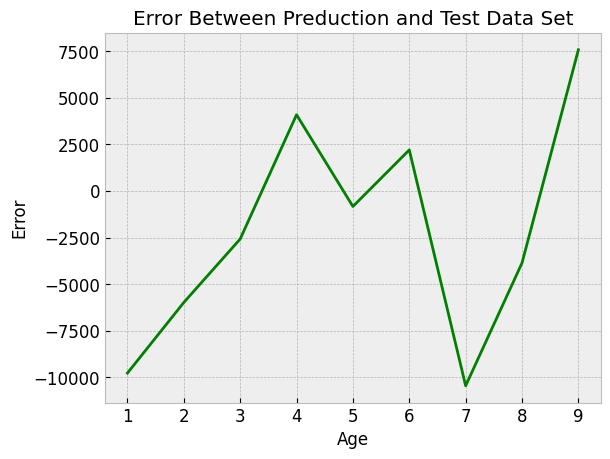

In [194]:
c = [i for i in range(1, len(y_test)+1, 1)]
y = y_test-y_predict
plt.plot(c, y, color='green', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Error')
plt.title('Error Between Preduction and Test Data Set')

plt.show()

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->
kaggle
google

In [200]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 6114 bytes to source.py
